# Demystifying Machine Learning
By: Stephanie Tzeng<br/>Senior Data Scientist @ AppNexus

> Machine Learning is a popular new field with the benefit of amazing branding. <br/>
> Intimidated by the name? Don't be! <br/>

## Other Resources...
If you are really interested in this field and want to learn from a trained teacher, check out the following to get started:

- Coursera: Andrew Ng's Machine Learning Class
- Stanford Online: Statistical Learning (Hastie and Tibshirani)

Online tutorials:
- Scikit Learn Online Tutorial


# Ok! Let's get started.
My purpose today is to unveil the scary black box of machine learning. Once you understand the general concept, you can start to grasp that all machine learning is built using the same fundamental principles. <br/>

- My talk is super introductory
- Mainly showing that machine learning isn't as scary as it sounds.

## You will have unlocked the key to the "magic" of machine learning.

<br/><br/><br/>

# Does this look familiar?

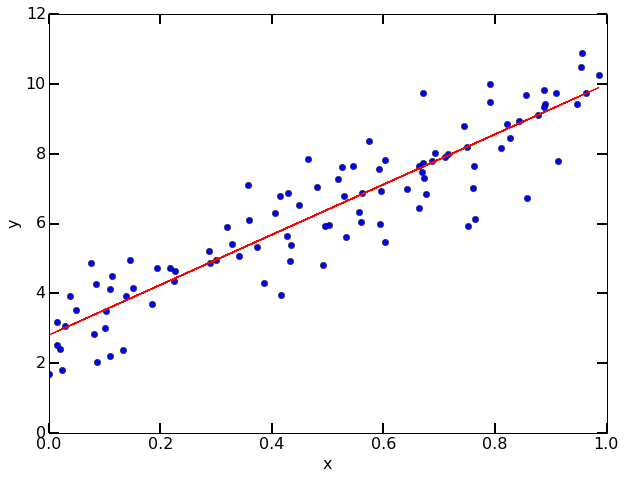

In [1]:
from IPython.display import Image
Image('files/fitline.png', width=500)

# Linear regression is a form of machine learning.

# Given any new $x$ you can predict $y$.

# This is a model:

# $y = mx + b$


# What does it predict?

# It predicts $y$.

$y$:  response (what you want to predict, output variable)<br/>
$x$:  features (data, observation, input variable) <br/>
$m$:  parameter (slope) <br/>
$b$:  bias (y intercept) <br/>

## Example: Housing Prices
$y$: response (price of house)<br/>
$x$: features (square footage, zip code, # of windows)

## Suppose you want to predict $y$ given $x$.

### You have $N$ points to fit.

### So you decide on a model (line).

## Let's try this algorithm:

Train the model (fit the line) by:
 1. Guess some set of parameters $m$ and $b$.
 1. Loop until error is minimized:
  - Tweak $m$ and $b$.
  - For each of the N values of $x_i$,<br/>'predict' $y_i'$ using $m x_i + b$.
  - Calculate error by adding up all of the squared differences $(y_i - y_i')^2$.

## You have now done<br/>"machine learning" and<br/>you have a model that predicts.

### In fact, some implementations of well-known machine learning algorithms are implemented similarly!

# Experiment:  
## if we create some *observations* $x$ <br/>where we know the *target* $y$ and *parameters* $(m, b)$, <br/> can we can *learn* $(m', b')$?

In [2]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy.stats import linregress  # linear regression (aka, machine learning)
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.precision = 2
%matplotlib inline

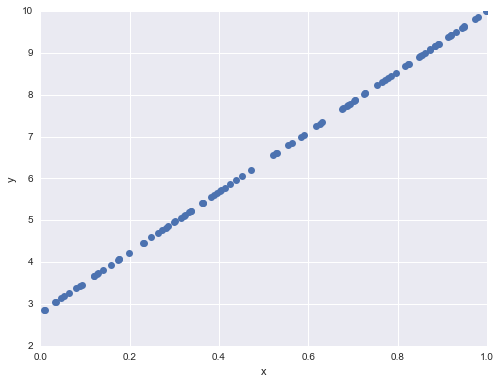

In [3]:
N = 100  # Number of data points.

# Observations (features, data, independent variable).
x = np.random.uniform(size=N)

# Parameters and constants.
# (Merely for programming convenience.)
m = 7.2
b = 2.8

# Target (dependent variable).
y = m * x + b

fig = plt.figure(figsize=(8,6))
ax = fig.gca()
tmp = ax.plot(x, y, 'o')
ax.set_xlabel('x')
tmp = ax.set_ylabel('y')

In [4]:
m_, b_, r_value, p_value, std_err = linregress(x, y)
m_, b_

(7.2000000000000028, 2.7999999999999976)

In [5]:
def linear_regression(x, y, m, b):
    m_, b_, r_value, p_value, std_err = linregress(x, y)
    df = pd.DataFrame({'m': [m, m_], 'b': [b, b_]}, index=('exact', 'learned'))
    return df[['m', 'b']]

In [6]:
linear_regression(x, y, m, b)

,m,b
exact,7.2,2.8
learned,7.2,2.8


# The real world is noisy.

In [7]:
noise = np.random.normal(size=N)
y += noise

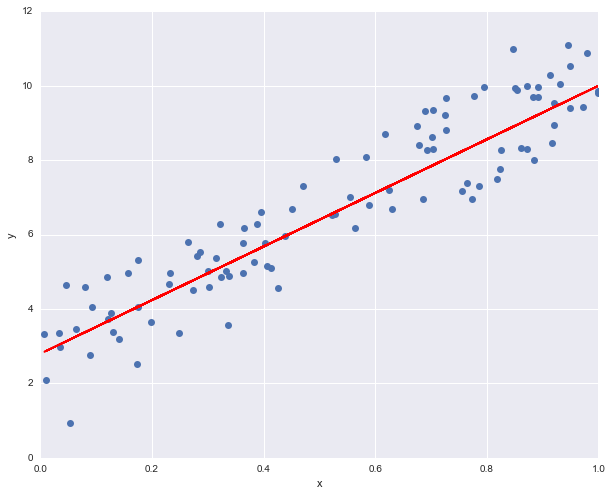

In [8]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca()
ax.plot(x, y, 'o')
ax.plot(x, m * x + b, 'r-')
ax.set_xlabel('x')
tmp = ax.set_ylabel('y')

In [9]:
linear_regression(x, y, m, b)

,m,b
exact,7.20,2.80
learned,7.45,2.84


# Machine Learning Translation

### You will see different notation<br/>in machine learning literature.
### Instead of $y = mx + b$
### it is $h(x) = \theta_0 + \theta_1 x$
* ### $h(x)$ is the *hypothesis*.
* ### $x$ is the *feature*.
* ### $\theta_0$ and $\theta_1$ are *parameters*.

### Error is quantified with a *cost function*, <br/> $J(\theta_0, \theta_1)$, which you want to minimize.
### "Minimizing the error" is really "minimizing the cost function"<br/>or "minimizing $J(\theta_0, \theta_1)$" to find $\Theta$.
### This *trains* the model.

### You can extend it to *multiple features*:

### $h(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \ldots + \theta_{j} x_{j}$

## I've only gone over a simple regression case. </br>But there are so many other algorithms!
</br>
## Machine Learning consists of:
* **Supervised Learning**: Data comes with labels or attributes we want to predict!
    *  **Regression**: Continuous Output <br/> Example) Price of an apartment as function of square footage and zip code
    *  **Classification**: Samples belong to discrete categories using labeled data and we want to predict the category of unlabeled data <br/> Example) spam or no spam
*  **Unsupervised Learning**: Training data doesn't have target values/response. The goal may be to discover groups of similar examples within data (clustering)



# Training Data vs Test Data
- ML is about learning properties of a data set and applying them to new data.
- Common to split data into 2 sets:
    - Training data
    - Test data

You should always evaluate your model by fitting your test set and measuring the error.

## You can do the same regression problem in the package scikit-learn in python

In [10]:
from sklearn import linear_model

# Use only one feature as a column.
X = x.reshape((x.shape[0], 1))

print 'x'
print x[:3]
print 'X'
print X[:3]

x
[ 0.24831941  0.87271944  0.58948746]
X
[[ 0.24831941]
 [ 0.87271944]
 [ 0.58948746]]


In [11]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X, y)

# The coefficients
regr.coef_[0], regr.intercept_

(7.4517430072079733, 2.8416554520447042)

## You can use the same format of input data to try out all of the packages available in scikit-learn!

## The API is super simple! </br></br>
## Let's try a toy data set and try it out.

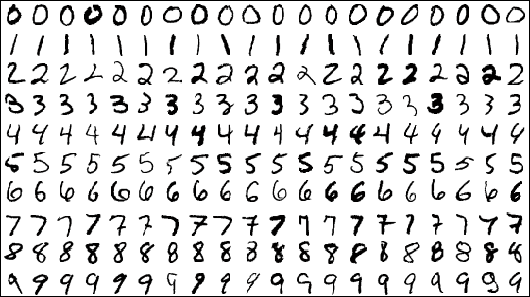

In [12]:
Image('files/mnist.png', width=500)

In [13]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

['images', 'data', 'target_names', 'DESCR', 'target']

In [14]:
digits.images.shape

(1797, 8, 8)

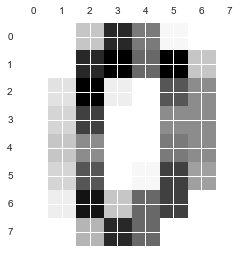

In [15]:
plt.matshow(digits.images[0], cmap=plt.cm.Greys)

In [16]:
print(digits.images[0])

[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]


In [17]:
digits.data.shape

(1797, 64)

In [18]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [19]:
digits.target.shape

(1797,)

**Data is always a numpy array (or sparse matrix) of shape (n_samples, n_features)**

Split the data:

In [20]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,
                                                    digits.target)


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print( y_test.shape)

(1347, 64)
(450, 64)
(1347,)
(450,)


Really Simple API
-------------------
0) Import your model class

In [21]:
from sklearn.svm import LinearSVC

1) Instantiate an object and set the parameters

In [22]:
svm = LinearSVC(C=0.1)

2) Fit the model

In [23]:
svm.fit(X_train, y_train)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

3) Apply / evaluate

In [24]:
print(svm.predict(X_test))
print(y_test)

[8 5 0 7 0 2 2 1 9 4 7 4 3 4 7 2 6 6 9 3 3 4 3 6 9 6 5 3 9 5 9 4 1 2 3 1 2
 7 8 3 3 5 0 2 4 2 9 7 4 6 9 6 9 5 7 2 5 6 7 8 3 2 2 8 5 7 2 0 8 9 0 0 3 6
 2 8 6 4 7 1 4 0 7 4 9 8 4 7 4 9 5 7 1 2 7 3 1 7 0 3 0 0 6 0 6 0 9 4 3 2 3
 1 8 0 2 4 8 1 0 8 9 9 9 1 6 6 1 0 3 9 4 1 1 5 9 5 9 3 0 7 3 2 6 4 6 7 8 9
 2 5 3 4 6 9 2 1 4 0 6 1 5 3 1 1 2 1 5 5 1 1 4 0 8 1 3 4 3 5 4 5 2 4 0 1 1
 2 8 1 3 5 0 3 5 6 5 3 4 6 9 7 4 2 4 5 5 7 3 1 2 0 4 9 2 4 3 4 3 9 7 9 6 8
 3 4 7 5 6 9 4 5 6 6 7 3 5 6 3 0 4 2 3 1 3 6 2 7 9 5 2 8 7 0 6 2 0 3 0 7 8
 3 1 2 3 5 3 9 1 7 9 6 7 0 8 1 4 7 7 2 5 2 1 0 9 4 8 7 6 0 5 1 8 2 6 2 2 2
 0 7 1 1 1 2 1 6 5 2 7 6 4 3 0 7 5 5 8 3 4 9 3 1 1 4 8 9 6 3 8 5 8 7 4 4 3
 0 0 3 8 2 4 8 8 2 7 0 2 9 5 4 6 0 8 8 5 5 7 9 0 3 5 2 8 1 5 9 3 0 8 8 3 1
 4 0 4 3 4 6 4 8 1 9 0 6 5 6 0 6 4 4 6 7 4 5 5 1 8 9 6 3 1 4 4 6 1 0 6 2 0
 9 0 0 6 6 4 3 3 6 0 8 2 1 8 3 5 0 3 9 7 3 0 0 3 8 6 8 4 9 4 0 2 2 8 7 2 2
 3 9 8 3 5 2]
[8 5 0 7 0 2 2 1 9 4 7 4 3 4 7 2 6 6 9 3 3 4 3 6 9 6 5 3 9 5 9 4 1 2 3 1 2
 7 8 9 3 5 

## You can out many different algorithms just by importing new model classes.

## Don't abuse the packages!
The package makes it so easy to take the same dataset and plug and chug many times on
all different algorithms.

With great power comes great responsibility. Make sure you are employing the right scientific practices!

# Thanks! Hope you learned something today.
# Good luck hacking :D